# Task 3 - To explore Unsupervised Machine Learning

# K-Means Clustering

In [236]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [237]:
#loading the data
iris = pd.read_csv('Iris.csv')

In [238]:
#viewing the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Selecting the features

In [239]:
x = iris.iloc[:, [0,1,2,3]].values

Loading the KMeans library

In [240]:
from sklearn.cluster import KMeans

# Implement K-Means with 5

In [241]:
k = KMeans(n_clusters=5)
y = k.fit_predict(x)
print(y)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Determinig the cluster centers

In [242]:
k.cluster_centers_

array([[135.5       ,   6.60666667,   3.01      ,   5.48333333],
       [ 44.        ,   5.28965517,   3.23103448,   2.26896552],
       [ 74.        ,   5.99032258,   2.76129032,   4.30645161],
       [105.        ,   6.22903226,   2.84516129,   5.07741935],
       [ 15.        ,   5.03793103,   3.45862069,   1.46896552]])

# Elbow method

We’ll plot a graph between the number of clusters and the corresponding error value.

The shape of elbow is approximately formed at k=3.

In [243]:
err =[]
for i in range(1, 11):
    k = KMeans(n_clusters = i).fit(x)
    k.fit(x)
    err.append(k.inertia_)

In [244]:
plt.style.use('seaborn')

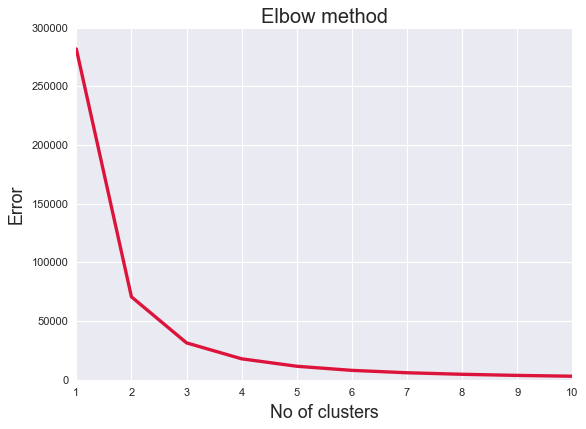

In [245]:
fig, ax = plt.subplots()
plt.plot(range(1, 11), err, color='crimson', lw=3, ms=18, figure=fig)
ax.set_title('Elbow method', size=18)
plt.xlabel('No of clusters', fontsize=16)
plt.ylabel('Error', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

Let’s implement k-means again using k=3

In [246]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [247]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Plotting the clusters and its centers

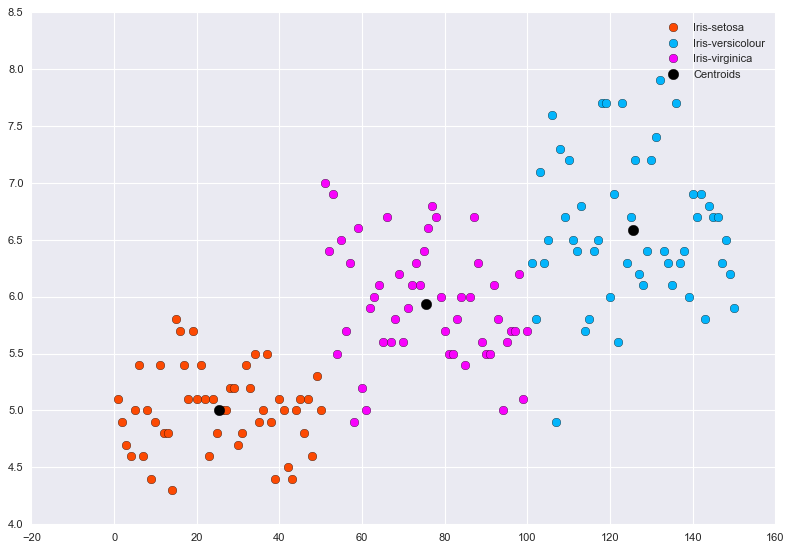

In [248]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 60, c = '#fc4a03', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 60, c = '#03b5fc', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 60, c ='#f803fc' , label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 90, c = 'black', label = 'Centroids')

plt.legend()

# Actual v/s Predicted

Let’s compare our original data versus our clustered results by plotting them

In [ ]:
from sklearn import datasets
new_labels = y_kmeans
# Plot the identified clusters and compare with the answers
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow', edgecolor='k', s=80)
ax[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=80)
ax[0].set_xlabel('Sepal length', fontsize=18)
ax[0].set_ylabel('Sepal width', fontsize=18)
ax[1].set_xlabel('Sepal length', fontsize=18)
ax[1].set_ylabel('Sepal width', fontsize=18)
ax[0].tick_params(direction='in', length=10, width=0.9, colors='k', labelsize=14)
ax[1].tick_params(direction='in', length=10, width=0.9, colors='k', labelsize=14)
ax[0].set_title('Actual', fontsize=22)
ax[1].set_title('Predicted', fontsize=22)


Text(0.5,1,'Predicted')